<a href="https://colab.research.google.com/github/JiwonOcho/ML-DL/blob/main/FNN_Classification_by_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import random
from matplotlib import pyplot as plt

In [ ]:
# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader():
    def __init__(self):
        # 데이터를 저장할 변수들입니다.
        self.train_X, self.train_Y, self.test_X, self.test_Y = self.read_data()

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    # 데이터를 읽어오기 위한 매서드입니다.
    def read_data(self):
        # 파일을 실행합니다.
        filename = os.listdir("data")[0]
        file = open("data/" + filename, encoding="utf8") # <====

        # 헤더를 제거합니다.
        file.readline()

        # 데이터와 레이블을 저장하기 위한 변수입니다.
        data = []

        # 파일을 한 줄씩 읽어옵니다.
        for line in file:
            # 컴마를 기준으로 split()을 실행합니다.
            splt = line.split(",")

            # split 결과물을 정리해 X값과 Y값으로 추립니다.
            x, cls = self.process_data(splt)

            # 추려낸 데이터를 저장합니다.
            data.append((x, cls))

        # 데이터를 섞습니다
        random.shuffle(data)

        X = []
        Y = []

        for el in data:
            X.append(el[0])
            Y.append(el[1])

        X = np.asarray(X)
        Y = np.asarray(Y)

        train_X = X[:int(len(X) * 0.8)]
        train_Y = Y[:int(len(Y) * 0.8)]
        test_X = X[int(len(X) * 0.8):]
        test_Y = Y[int(len(Y) * 0.8):]

        return train_X, train_Y, test_X, test_Y

    # split() 값을 정리하기 위한 매서드입니다.
    def process_data(self, splt):
        # 읽어온 splt 값에서 학교, 성별, 키, 몸무게만 추출합니다.
        school = splt[9]
        gender = splt[13]
        height = float(splt[15]) / 194.2
        weight = float(splt[16]) / 130.7

        # 완성된 데이터를 저장할 변수입니다.
        data = []

        # 키와 몸무게를 삽입합니다.
        data.append(height)
        data.append(weight)

        # 성별을 삽입합니다. 남자일 경우 1, 여자일 경우 0을 삽입합니다.
        if gender == "남":
            data.append(1)
        else:
            data.append(0)

        # 초등학교, 중학교, 고등학교 정보를 원 핫 벡터로 정리합니다.
        # cls는 레이블 역할을 수행합니다.
        if school.endswith("초등학교"):
            cls = 0
        elif school.endswith("중학교"):
            cls = 1
        elif school.endswith("고등학교"):
            cls = 2

        # 결과물을 리턴합니다.
        return data, cls


In [ ]:
def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    plt.legend(['train', 'validate'])
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.legend(['train', 'validate'])
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")


In [ ]:
#import data_reader

In [ ]:
# 데이터를 읽어옵니다.
dr = DataReader()



Data Read Done!
Training X Size : (7745, 3)
Training Y Size : (7745,)
Test X Size : (1937, 3)
Test Y Size : (1937,)




In [ ]:
from tensorflow import keras

In [ ]:
EPOCHS = 20  # 예제 기본값은 20입니다.

In [ ]:
# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", #손실함수는 분류함수 
              metrics=["accuracy"])

In [ ]:
# 인공신경망을 학습시킵니다.
print("************ TRAINING START ************")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

************ TRAINING START ************
Epoch 1/20
243/243 [==============================] - 2s 3ms/step - loss: 0.9921 - accuracy: 0.5135 - val_loss: 0.8627 - val_accuracy: 0.6402
Epoch 2/20
243/243 [==============================] - 1s 3ms/step - loss: 0.7782 - accuracy: 0.6691 - val_loss: 0.7144 - val_accuracy: 0.6742
Epoch 3/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.6901 - val_loss: 0.6674 - val_accuracy: 0.6939
Epoch 4/20
243/243 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.6939 - val_loss: 0.6636 - val_accuracy: 0.6815
Epoch 5/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6507 - accuracy: 0.6952 - val_loss: 0.6482 - val_accuracy: 0.7052
Epoch 6/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6483 - accuracy: 0.6935 - val_loss: 0.6443 - val_accuracy: 0.6949
Epoch 7/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6426 - accuracy: 0.6980 - val_l

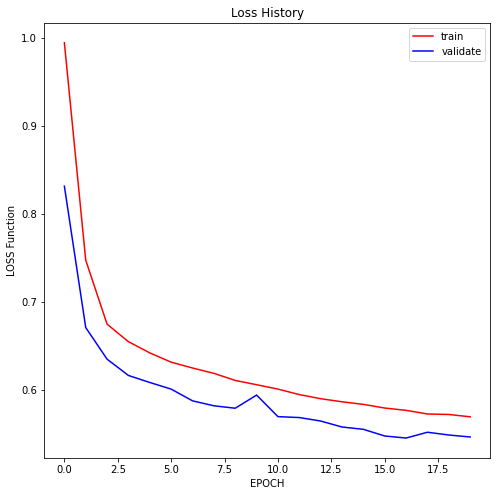

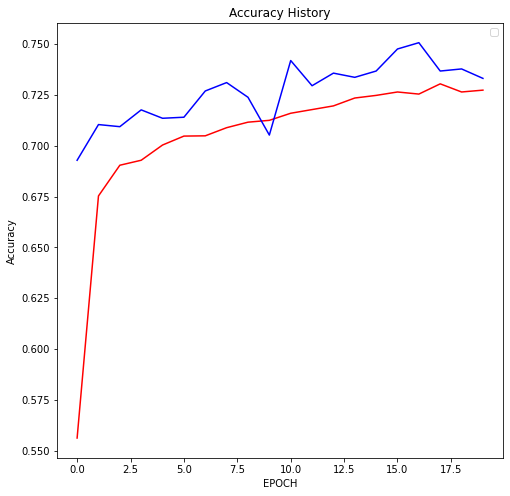

In [ ]:
# 학습 결과를 그래프로 출력합니다.
draw_graph(history)